In [1]:
# 次元を削減するために主成分分析(pca)を行う
import pandas as pd
pokemon = pd.read_csv('https://raw.githubusercontent.com/we-b/datasets_for_ai/master/poke.csv')
pokemon.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,318,45,49,49,65,65,45,False
1,Ivysaur,405,60,62,63,80,80,60,False
2,Venusaur,525,80,82,83,100,100,80,False
3,Charmander,309,39,52,43,60,50,65,False
4,Charmeleon,405,58,64,58,80,65,80,False


In [11]:
import numpy as np
X = np.array(pokemon) # 分析用データにするためにnumpy配列に変換
X = X[:,2:8]

In [12]:
from sklearn.decomposition import PCA

# 主成分を2に設定したインスタンスを作成
pca = PCA(n_components=2)
# PCAのインスタンスでポケモンのデータを学習
pca.fit(X)
# データについて学習したPCAで主成分を抽出する
X_pca = pca.transform(X)
# 1列目が第一主成分軸、2列目が第二主成分軸
print(X_pca)

[[ -32.51693378  -10.25507669]
 [   2.48189733   -9.98844724]
 [  50.64577331   -7.87828927]
 [ -38.8412626   -21.17420807]
 [   0.18699222  -21.63253347]
 [  52.80307074  -23.0589564 ]
 [ -37.16150087    4.62105899]
 [  -0.5666316     6.06844414]
 [  49.95705578    7.5024355 ]
 [ -88.0191591    -1.34868221]
 [ -84.05216172   12.39571392]
 [  -0.31787084  -33.10710486]
 [ -87.94563852   -6.20266177]
 [ -83.97864115    7.54173437]
 [  -3.18890354   -4.29238677]
 [ -64.47486149   -8.30903105]
 [ -24.9987157    -4.50420808]
 [  26.29733455   -8.03715293]
 [ -65.50918035  -14.45520928]
 [  -0.58471256  -13.16984504]
 [ -60.6754789   -13.40493038]
 [  10.94588214   -9.00622264]
 [ -48.04247984   -5.63352518]
 [  12.16236514   -2.99582772]
 [ -37.27241343  -32.84966326]
 [  32.35290877  -35.24798315]
 [ -49.38587465   45.54208419]
 [  10.81897033   48.17978165]
 [ -53.69156007    8.76647879]
 [ -17.56865308   10.34909727]
 [  39.46390376   15.06451855]
 [ -54.02711002   -1.14833392]
 [ -17.3

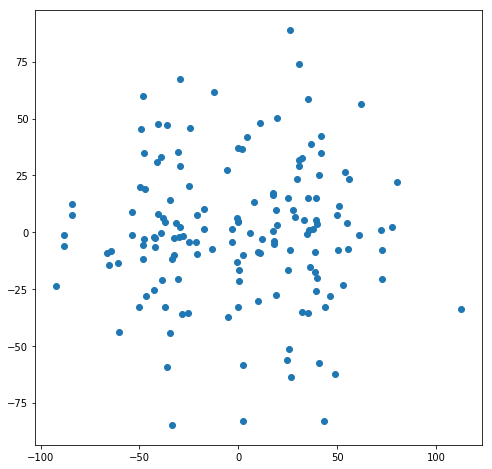

In [13]:
# 特徴抽出の効果を確認
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x=X_pca[:,0]
y=X_pca[:,1]
fig,ax=plt.subplots(figsize=(8,8)) # これ何してる
plt.scatter(x,y)
plt.show()

In [14]:
# 寄与率、因子負荷量を用いて主成分分析の評価を

# 寄与率
pca.explained_variance_ratio_
# 第一主成分で40％、第二主成分で20％ほど、元のデータの説明ができているとわかる
# 仮に主成分を6とした場合、元の次元数と同じなため足して100％の説明ができる

array([ 0.38949774,  0.21741941])

In [15]:
# 因子負荷量(特徴量の各主成分への影響)
pca.components_
# 値は係数を表す

array([[ 0.41915485,  0.41490581,  0.29426427,  0.49468917,  0.47196228,
         0.31321743],
       [ 0.27777556,  0.39575965,  0.52446972, -0.39295343, -0.13523332,
        -0.56431028]])

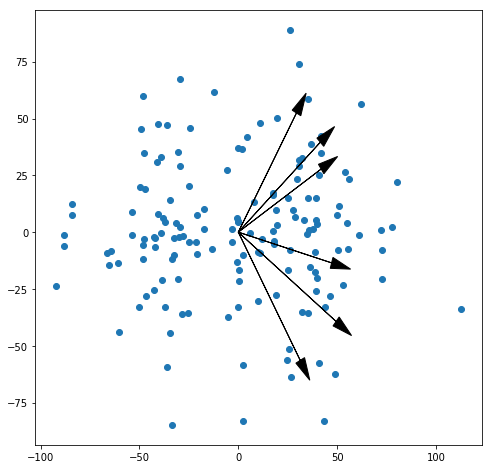

In [20]:
# 因子負荷量も可視化してプロット
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x, y)
for i in range(pca.components_.shape[1]):
    x1=pca.components_[0,i]*100
    y1=pca.components_[1,i]*100
    ax.arrow(0, 0, x1, y1,  head_width=5, head_length=10, fc='k', ec='k')
plt.show()

In [ ]:
# 特徴抽出は主成分分析以外にもたくさんあるからチャレンジしよう